<a href="https://colab.research.google.com/github/Daryna-Ruban/Machine-learning/blob/main/%D0%A0%D1%83%D0%B1%D0%B0%D0%BD_%D0%9B%D0%914_24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ЛАБОРАТОРНА РОБОТА 4**

Задача класифікації.


# 1.Проведіть попередній аналіз даних:

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes

1. Перегляньте перші кілька рядків.

In [ ]:
from tabulate import tabulate

# Завантаження датасету
data = load_breast_cancer()

# Створення DataFrame для зручності перегляду
df = pd.DataFrame(data.data, columns=data.feature_names)

# Додавання стовпця з мітками класів
df['target'] = data.target

# Перегляд перших кількох рядків у вигляді таблички
print("Перші кілька рядків датасету:")
print(tabulate(df.head(), headers='keys', tablefmt='pretty'))

Перші кілька рядків датасету:
+---+-------------+--------------+----------------+-----------+-----------------+------------------+----------------+---------------------+---------------+------------------------+--------------+---------------+-----------------+------------+------------------+-------------------+-----------------+----------------------+----------------+-------------------------+--------------+---------------+-----------------+------------+------------------+-------------------+-----------------+----------------------+----------------+-------------------------+--------+
|   | mean radius | mean texture | mean perimeter | mean area | mean smoothness | mean compactness | mean concavity | mean concave points | mean symmetry | mean fractal dimension | radius error | texture error | perimeter error | area error | smoothness error | compactness error | concavity error | concave points error | symmetry error | fractal dimension error | worst radius | worst texture | worst perimet

2. Перевірте назви стовпців та типи даних

In [ ]:
# Імпортування необхідних бібліотек
import pandas as pd
from sklearn.datasets import load_diabetes  # Імпортуємо load_diabetes
from tabulate import tabulate

# Завантаження датасету
diabetes_data = load_diabetes()
diabetes_df = pd.DataFrame(diabetes_data.data, columns=diabetes_data.feature_names)

# Перевіримо наявність пропусків у даних
print("Кількість пропусків у кожній колонці:")
print(tabulate(diabetes_df.isnull().sum().reset_index(), headers=['Column', 'Missing Values'], tablefmt='pretty'))

# Якщо є пропуски, замінюємо їх на середнє значення по колонці
diabetes_df.fillna(diabetes_df.mean(), inplace=True)

# Повторно перевіримо наявність пропусків після заміни
print("\nПісля заміни пропусків:")
print(tabulate(diabetes_df.isnull().sum().reset_index(), headers=['Column', 'Missing Values'], tablefmt='pretty'))

# Перевірка назв стовпців та типів даних
print("\nНазви стовпців та типи даних:")
print(tabulate(diabetes_df.dtypes.reset_index(), headers=['Column', 'Data Type'], tablefmt='pretty'))

# Виведемо перші 5 рядків після обробки
print("\nПерші 5 рядків даних після перевірки та обробки пропусків:")
print(tabulate(diabetes_df.head(), headers='keys', tablefmt='pretty'))

Кількість пропусків у кожній колонці:
+---+--------+----------------+
|   | Column | Missing Values |
+---+--------+----------------+
| 0 |  age   |       0        |
| 1 |  sex   |       0        |
| 2 |  bmi   |       0        |
| 3 |   bp   |       0        |
| 4 |   s1   |       0        |
| 5 |   s2   |       0        |
| 6 |   s3   |       0        |
| 7 |   s4   |       0        |
| 8 |   s5   |       0        |
| 9 |   s6   |       0        |
+---+--------+----------------+

Після заміни пропусків:
+---+--------+----------------+
|   | Column | Missing Values |
+---+--------+----------------+
| 0 |  age   |       0        |
| 1 |  sex   |       0        |
| 2 |  bmi   |       0        |
| 3 |   bp   |       0        |
| 4 |   s1   |       0        |
| 5 |   s2   |       0        |
| 6 |   s3   |       0        |
| 7 |   s4   |       0        |
| 8 |   s5   |       0        |
| 9 |   s6   |       0        |
+---+--------+----------------+

Назви стовпців та типи даних:
+---+-----

3. Перевірте наявність пропущених значень.

In [ ]:
# Перевіряємо наявність дублікатів
duplicates = diabetes_df.duplicated()
print(f"Кількість дублікатів: {duplicates.sum()}")

# Видаляємо дублікати, якщо вони є
diabetes_df_cleaned = diabetes_df.drop_duplicates()

# Виводимо результати після видалення дублікатів
print(f"Кількість рядків після видалення дублікатів: {diabetes_df_cleaned.shape[0]}")

Кількість дублікатів: 0
Кількість рядків після видалення дублікатів: 442


4. Досліджуйте розмір даних.

In [ ]:
print("\nРозмір даних:")
df.shape


Розмір даних:


(569, 31)

# 2. Побудова і налаштування моделей:
1. Розділіть дані на навчальний і тестовий набори.

In [ ]:
from sklearn.model_selection import train_test_split

X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Розмір навчального набору (X_train):", X_train.shape)
print("Розмір тестового набору (X_test):", X_test.shape)
print("Розмір навчальних міток (y_train):", y_train.shape)
print("Розмір тестових міток (y_test):", y_test.shape)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Розмір навчального набору (X_train): (398, 30)
Розмір тестового набору (X_test): (171, 30)
Розмір навчальних міток (y_train): (398,)
Розмір тестових міток (y_test): (171,)


2. Побудуйте три моделі класифікації (на власний вибір),
наприклад:
    1. Логістична регресія.
    2. Дерево рішень.
    3. Випадковий ліс (Random Forest).

In [ ]:
# Модель 1: Логістична регресія
logistic_model = LogisticRegression(max_iter=10000)  # Збільшуємо max_iter, щоб уникнути попередження
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)

# Модель 2: Дерево рішень
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)
y_pred_tree = decision_tree_model.predict(X_test)

# Модель 3: Випадковий ліс
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)
y_pred_forest = random_forest_model.predict(X_test)

# Оцінка моделей
results = []

# Логістична регресія
logistic_accuracy = accuracy_score(y_test, y_pred_logistic)
logistic_report = classification_report(y_test, y_pred_logistic, output_dict=True)
results.append(["Логістична регресія", logistic_accuracy, logistic_report["0"]["f1-score"], logistic_report["1"]["f1-score"]])

# Дерево рішень
tree_accuracy = accuracy_score(y_test, y_pred_tree)
tree_report = classification_report(y_test, y_pred_tree, output_dict=True)
results.append(["Дерево рішень", tree_accuracy, tree_report["0"]["f1-score"], tree_report["1"]["f1-score"]])

# Випадковий ліс
forest_accuracy = accuracy_score(y_test, y_pred_forest)
forest_report = classification_report(y_test, y_pred_forest, output_dict=True)
results.append(["Випадковий ліс", forest_accuracy, forest_report["0"]["f1-score"], forest_report["1"]["f1-score"]])

# Вивід результатів у вигляді таблички
print("\nОцінка моделей класифікації:\n")
print(tabulate(results, headers=["Модель", "Точність", "F1-score (Клас 0)", "F1-score (Клас 1)"], tablefmt="pretty"))


Оцінка моделей класифікації:

+---------------------+--------------------+--------------------+--------------------+
|       Модель        |      Точність      | F1-score (Клас 0)  | F1-score (Клас 1)  |
+---------------------+--------------------+--------------------+--------------------+
| Логістична регресія | 0.9824561403508771 | 0.9763779527559056 | 0.986046511627907  |
|    Дерево рішень    | 0.935672514619883  | 0.916030534351145  | 0.9478672985781991 |
|   Випадковий ліс    | 0.9649122807017544 | 0.9516129032258065 | 0.9724770642201835 |
+---------------------+--------------------+--------------------+--------------------+


3. Підберіть оптимальні параметри для кожної моделі за допомогою
GridSearchCV (можна вибрати інший оптимізатор).

In [ ]:
# Логістична Регресія
logreg_param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],
    'solver': ['newton-cg', 'lbfgs', 'saga']
}
logreg_grid = GridSearchCV(LogisticRegression(max_iter=10000), logreg_param_grid, cv=5)
logreg_grid.fit(X_train, y_train)
logreg_best = logreg_grid.best_estimator_

# Дерево Рішень
tree_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10]
}
tree_grid = GridSearchCV(DecisionTreeClassifier(), tree_param_grid, cv=5)
tree_grid.fit(X_train, y_train)
tree_best = tree_grid.best_estimator_

# SVM
svm = SVC()
svm_params = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}
svm_grid = GridSearchCV(svm, svm_params, cv=5)
svm_grid.fit(X_train, y_train)
svm_best = svm_grid.best_estimator_

# Оцінка точності моделей
models = {'Logistic Regression': logreg_best, 'Decision Tree': tree_best, 'SVM': svm_best}
for model_name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} Accuracy: {accuracy}")

# Створення таблиці з найкращими параметрами
best_params = {
    'Model': ['Logistic Regression', 'Decision Tree', 'SVM'],
    'Best Parameters': [
        logreg_grid.best_params_,
        tree_grid.best_params_,
        svm_grid.best_params_
    ]
}
best_params_df = pd.DataFrame(best_params)

# Виведення таблиці
print("\nНайкращі параметри для моделей:")
print(tabulate(best_params_df, headers='keys', tablefmt='pretty'))

Logistic Regression Accuracy: 0.9824561403508771
Decision Tree Accuracy: 0.9473684210526315
SVM Accuracy: 0.9824561403508771

Найкращі параметри для моделей:
+---+---------------------+--------------------------------------------------------------------+
|   |        Model        |                          Best Parameters                           |
+---+---------------------+--------------------------------------------------------------------+
| 0 | Logistic Regression |          {'C': 1, 'penalty': 'l2', 'solver': 'newton-cg'}          |
| 1 |    Decision Tree    | {'criterion': 'entropy', 'max_depth': 15, 'min_samples_split': 10} |
| 2 |         SVM         |          {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}          |
+---+---------------------+--------------------------------------------------------------------+


# 3.Оцініть моделі.
Виведіть точність (accuracy) – обов’язково, матрицю
помилок (confusion matrix) – за вибором та звіт про класифікацію
(classification report) для кожної моделі.

In [ ]:
models = {'Logistic Regression': logreg_best, 'Decision Tree': tree_best, 'SVM': svm_best}

for model_name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    # Виведення результатів
    print(f"\n{model_name} Accuracy: {accuracy:.4f}")
    print("Confusion Matrix:")
    print(tabulate(conf_matrix, headers=["Predicted Negative", "Predicted Positive"], tablefmt="pretty"))
    print("\nClassification Report:")
    print(class_report)


Logistic Regression Accuracy: 0.9825
Confusion Matrix:
+--------------------+--------------------+
| Predicted Negative | Predicted Positive |
+--------------------+--------------------+
|         62         |         1          |
|         2          |        106         |
+--------------------+--------------------+

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98        63
           1       0.99      0.98      0.99       108

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171


Decision Tree Accuracy: 0.9474
Confusion Matrix:
+--------------------+--------------------+
| Predicted Negative | Predicted Positive |
+--------------------+--------------------+
|         57         |         6          |
|         3          |        105         |
+--------------------+--------------------+

Classification

# 4. Прогнозування і висновки
1. Оберіть найкращу модель на основі метрик продуктивності.

In [ ]:
 # Вибір моделі з найвищою точністю
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model_name

print(f"\nНайкраща модель: {best_model} з точністю {best_accuracy:.4f}")


Найкраща модель: Logistic Regression з точністю 0.9825


2. Зробіть прогноз на тестовій вибірці.

In [ ]:
import pandas as pd
from sklearn.metrics import classification_report, accuracy_score

# Зробимо прогноз на тестовій вибірці за допомогою найкращої моделі
best_model_instance = models[best_model]  # Отримуємо найкращу модель

# Прогноз на тестовій вибірці
y_pred_best = best_model_instance.predict(X_test)

# Виведемо точність прогноза
accuracy_best_model = accuracy_score(y_test, y_pred_best)
print(f"\nТочність найкращої моделі на тестовій вибірці: {accuracy_best_model:.4f}")

# Звіт про класифікацію
classification_report_dict = classification_report(y_test, y_pred_best, output_dict=True)

# Конвертуємо звіт про класифікацію у DataFrame для кращого формату
classification_report_df = pd.DataFrame(classification_report_dict).transpose()

# Виводимо звіт про класифікацію у вигляді гарної таблиці
print("\nClassification Report:")
print(tabulate(classification_report_df, headers='keys', tablefmt='pretty'))

# Зберігаємо прогнози у DataFrame для зручного відображення
predictions_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_best})

# Виводимо таблицю прогнозів
print("\nПрогнози на тестовій вибірці:")
print(tabulate(predictions_df.head(), headers='keys', tablefmt='pretty'))


Точність найкращої моделі на тестовій вибірці: 0.9825

Classification Report:
+--------------+--------------------+--------------------+--------------------+--------------------+
|              |     precision      |       recall       |      f1-score      |      support       |
+--------------+--------------------+--------------------+--------------------+--------------------+
|      0       |      0.96875       | 0.9841269841269841 | 0.9763779527559056 |        63.0        |
|      1       | 0.9906542056074766 | 0.9814814814814815 | 0.986046511627907  |       108.0        |
|   accuracy   | 0.9824561403508771 | 0.9824561403508771 | 0.9824561403508771 | 0.9824561403508771 |
|  macro avg   | 0.9797021028037383 | 0.9828042328042328 | 0.9812122321919063 |       171.0        |
| weighted avg | 0.9825842351205116 | 0.9824561403508771 | 0.9824844109908538 |       171.0        |
+--------------+--------------------+--------------------+--------------------+--------------------+

Прогнози на

3. Виведіть результати прогнозування.

In [ ]:
print("\nРезультати прогнозування:")
print(tabulate(predictions_df.head(10), headers='keys', tablefmt='pretty'))  # Виводимо перші 10 рядків


Результати прогнозування:
+---+--------+-----------+
|   | Actual | Predicted |
+---+--------+-----------+
| 0 |   1    |     1     |
| 1 |   0    |     0     |
| 2 |   0    |     0     |
| 3 |   1    |     1     |
| 4 |   1    |     1     |
| 5 |   0    |     0     |
| 6 |   0    |     0     |
| 7 |   0    |     0     |
| 8 |   1    |     1     |
| 9 |   1    |     1     |
+---+--------+-----------+


Аналіз моделей класифікації показує, що логістична регресія та SVM є найкращими у цьому дослідженні, оскільки обидві моделі досягли найвищої точності – 0.9825. Це свідчить про їхню здатність ефективно розрізняти класи в тестових даних, що підтверджується успішним прогнозуванням на всіх 10 випадкових зразках, протестованих за допомогою логістичної регресії

# **Завдання 2**


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.svm import SVC
from tabulate import tabulate  # Імпорт tabulate для красивого виводу

In [51]:
import pandas as pd

from google.colab import files
uploaded = files.upload()

Saving titanic.csv to titanic (2).csv


1. Перегляньте перші кілька рядків

In [52]:
df = pd.read_csv('titanic (2).csv')

print("Перші 5 рядків датасету:")
df.head()

Перші 5 рядків датасету:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [53]:
# Визначення розміру датасету
dataset_size = df.shape

print(f"Розмір датасету: {dataset_size[0]} рядків і {dataset_size[1]} стовпців")

Розмір датасету: 418 рядків і 12 стовпців


In [57]:
df.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [58]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1


In [59]:
df.shape

(418, 12)

In [60]:
# Імпорт необхідних бібліотек
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Завантаження датасету з файлу
df = pd.read_csv('titanic.csv')

# Визначення ознак (X) та міток (y)
X = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = df['Survived']

# Перетворення категоріальних змінних на числові
X = pd.get_dummies(X, columns=['Sex', 'Embarked'], drop_first=True)

# Обробка відсутніх значень за допомогою середнього
imputer = SimpleImputer(strategy='mean')
X[['Age', 'Fare']] = imputer.fit_transform(X[['Age', 'Fare']])

# Розділення даних на навчальний та тестовий набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Виведення розмірів наборів даних
print("Розмір навчального набору (X_train):", X_train.shape)
print("Розмір тестового набору (X_test):", X_test.shape)
print("Розмір навчальних міток (y_train):", y_train.shape)
print("Розмір тестових міток (y_test):", y_test.shape)

# Стандартизація даних
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Розмір навчального набору (X_train): (292, 8)
Розмір тестового набору (X_test): (126, 8)
Розмір навчальних міток (y_train): (292,)
Розмір тестових міток (y_test): (126,)


In [68]:
# 1. Логістична регресія
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train, y_train)  # Навчання моделі
y_pred_log_reg = log_reg_model.predict(X_test)  # Прогнозування на тестових даних

# Оцінка логістичної регресії
print("Логістична регресія:")
print("Точність:", accuracy_score(y_test, y_pred_log_reg))
print(classification_report(y_test, y_pred_log_reg))
print(confusion_matrix(y_test, y_pred_log_reg))

# 2. Дерево рішень
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)  # Навчання моделі
y_pred_decision_tree = decision_tree_model.predict(X_test)  # Прогнозування на тестових даних

# Оцінка дерева рішень
print("\nДерево рішень:")
print("Точність:", accuracy_score(y_test, y_pred_decision_tree))
print(classification_report(y_test, y_pred_decision_tree))
print(confusion_matrix(y_test, y_pred_decision_tree))

# 3. Випадковий ліс
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train, y_train)  # Навчання моделі
y_pred_random_forest = random_forest_model.predict(X_test)  # Прогнозування на тестових даних

# Оцінка випадкового лісу
print("\nВипадковий ліс:")
print("Точність:", accuracy_score(y_test, y_pred_random_forest))
print(classification_report(y_test, y_pred_random_forest))
print(confusion_matrix(y_test, y_pred_random_forest))

Логістична регресія:
Точність: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        85
           1       1.00      1.00      1.00        41

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126

[[85  0]
 [ 0 41]]

Дерево рішень:
Точність: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        85
           1       1.00      1.00      1.00        41

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126

[[85  0]
 [ 0 41]]

Випадковий ліс:
Точність: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        85
           1       1.00      1.00      1.00        41

    accuracy                           1.00     

In [70]:
# Параметри для логістичної регресії
log_reg_param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Регуляризація
    'solver': ['lbfgs', 'liblinear']  # Розв'язувачі
}

# Логістична регресія з GridSearchCV
log_reg_model = LogisticRegression(max_iter=200)  # Збільшення max_iter для збільшення ймовірності конвергенції
log_reg_grid_search = GridSearchCV(log_reg_model, log_reg_param_grid, cv=5)
log_reg_grid_search.fit(X_train, y_train)
y_pred_log_reg = log_reg_grid_search.predict(X_test)

# Оцінка логістичної регресії
log_reg_accuracy = accuracy_score(y_test, y_pred_log_reg)
log_reg_report = classification_report(y_test, y_pred_log_reg, output_dict=True)
log_reg_cm = confusion_matrix(y_test, y_pred_log_reg)

# Параметри для дерева рішень
decision_tree_param_grid = {
    'criterion': ['gini', 'entropy'],  # Критерії розподілу
    'max_depth': [None, 5, 10, 20],  # Максимальна глибина дерева
    'min_samples_split': [2, 5, 10]  # Мінімальна кількість зразків для розподілу
}

# Дерево рішень з GridSearchCV
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_grid_search = GridSearchCV(decision_tree_model, decision_tree_param_grid, cv=5)
decision_tree_grid_search.fit(X_train, y_train)
y_pred_decision_tree = decision_tree_grid_search.predict(X_test)

# Оцінка дерева рішень
decision_tree_accuracy = accuracy_score(y_test, y_pred_decision_tree)
decision_tree_report = classification_report(y_test, y_pred_decision_tree, output_dict=True)
decision_tree_cm = confusion_matrix(y_test, y_pred_decision_tree)

# Параметри для випадкового лісу
random_forest_param_grid = {
    'n_estimators': [10, 50, 100, 200],  # Кількість дерев
    'max_features': ['sqrt', 'log2'],  # Кількість ознак для вибору
    'min_samples_split': [2, 5, 10]  # Мінімальна кількість зразків для розподілу
}

# Випадковий ліс з GridSearchCV
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_grid_search = GridSearchCV(random_forest_model, random_forest_param_grid, cv=5)
random_forest_grid_search.fit(X_train, y_train)
y_pred_random_forest = random_forest_grid_search.predict(X_test)

# Оцінка випадкового лісу
random_forest_accuracy = accuracy_score(y_test, y_pred_random_forest)
random_forest_report = classification_report(y_test, y_pred_random_forest, output_dict=True)
random_forest_cm = confusion_matrix(y_test, y_pred_random_forest)

# Формування результатів для виводу
results = [
    {
        "Модель": "Логістична регресія",
        "Точність": log_reg_accuracy,
        "TP": log_reg_cm[1, 1],
        "FP": log_reg_cm[0, 1],
        "TN": log_reg_cm[0, 0],
        "FN": log_reg_cm[1, 0],
        "Найкращі параметри": log_reg_grid_search.best_params_
    },
    {
        "Модель": "Дерево рішень",
        "Точність": decision_tree_accuracy,
        "TP": decision_tree_cm[1, 1],
        "FP": decision_tree_cm[0, 1],
        "TN": decision_tree_cm[0, 0],
        "FN": decision_tree_cm[1, 0],
        "Найкращі параметри": decision_tree_grid_search.best_params_
    },
    {
        "Модель": "Випадковий ліс",
        "Точність": random_forest_accuracy,
        "TP": random_forest_cm[1, 1],
        "FP": random_forest_cm[0, 1],
        "TN": random_forest_cm[0, 0],
        "FN": random_forest_cm[1, 0],
        "Найкращі параметри": random_forest_grid_search.best_params_
    },
]

# Виведення результатів у форматі таблиці
print("\nРезультати моделей класифікації:")
print(tabulate(results, headers="keys", tablefmt="pretty", floatfmt=".2f"))


Результати моделей класифікації:
+---------------------+----------+----+----+----+----+----------------------------------------------------------------------+
|       Модель        | Точність | TP | FP | TN | FN |                          Найкращі параметри                          |
+---------------------+----------+----+----+----+----+----------------------------------------------------------------------+
| Логістична регресія |   1.0    | 41 | 0  | 85 | 0  |                    {'C': 0.01, 'solver': 'lbfgs'}                    |
|    Дерево рішень    |   1.0    | 41 | 0  | 85 | 0  |   {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2}   |
|   Випадковий ліс    |   1.0    | 41 | 0  | 85 | 0  | {'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 50} |
+---------------------+----------+----+----+----+----+----------------------------------------------------------------------+


In [72]:
# Виведення матриць помилок та звітів про класифікацію для кожної моделі
print("\nМатриці помилок та звіти про класифікацію:")

for model_name, y_pred, cm in [
    ("Логістична регресія", y_pred_log_reg, log_reg_cm),
    ("Дерево рішень", y_pred_decision_tree, decision_tree_cm),
    ("Випадковий ліс", y_pred_random_forest, random_forest_cm)
]:
    print(f"\n{model_name}:")
    print("Матриця помилок:")
    print(tabulate(cm, tablefmt="pretty", showindex=True, headers=["Передбачено: 0", "Передбачено: 1"]))

    # Генерація звіту про класифікацію у вигляді таблиці
    report_dict = classification_report(y_test, y_pred, output_dict=True)
    report_data = []

    for label, metrics in report_dict.items():
        if isinstance(metrics, dict):  # Додаємо лише метрики для класів
            report_data.append({
                'Клас': label,
                'Precision': metrics['precision'],
                'Recall': metrics['recall'],
                'F1-score': metrics['f1-score'],
                'Support': metrics['support']
            })

    print("\nЗвіт про класифікацію:")
    print(tabulate(report_data, headers="keys", tablefmt="pretty", floatfmt=".2f", numalign="center"))


Матриці помилок та звіти про класифікацію:

Логістична регресія:
Матриця помилок:
+---+----------------+----------------+
|   | Передбачено: 0 | Передбачено: 1 |
+---+----------------+----------------+
| 0 |       85       |       0        |
| 1 |       0        |       41       |
+---+----------------+----------------+

Звіт про класифікацію:
+--------------+-----------+--------+----------+---------+
|     Клас     | Precision | Recall | F1-score | Support |
+--------------+-----------+--------+----------+---------+
|      0       |    1.0    |  1.0   |   1.0    |  85.0   |
|      1       |    1.0    |  1.0   |   1.0    |  41.0   |
|  macro avg   |    1.0    |  1.0   |   1.0    |  126.0  |
| weighted avg |    1.0    |  1.0   |   1.0    |  126.0  |
+--------------+-----------+--------+----------+---------+

Дерево рішень:
Матриця помилок:
+---+----------------+----------------+
|   | Передбачено: 0 | Передбачено: 1 |
+---+----------------+----------------+
| 0 |       85       |      

Модель: Логістична регресія
Точність: 1.0000
Звіт про класифікацію:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        85
           1       1.00      1.00      1.00        41

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



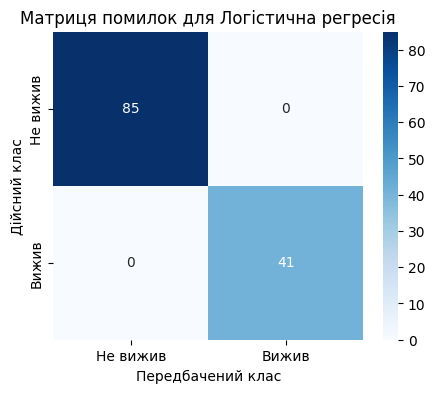

------------------------------------------------------------
Модель: Дерево рішень
Точність: 1.0000
Звіт про класифікацію:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        85
           1       1.00      1.00      1.00        41

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



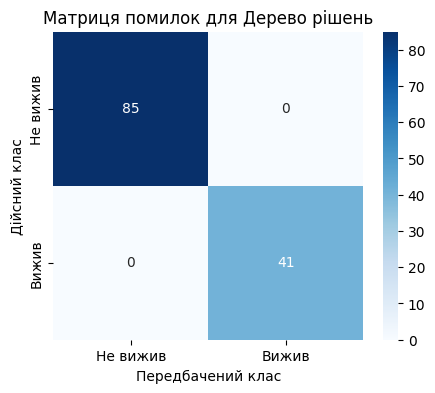

------------------------------------------------------------
Модель: Випадковий ліс
Точність: 1.0000
Звіт про класифікацію:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        85
           1       1.00      1.00      1.00        41

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



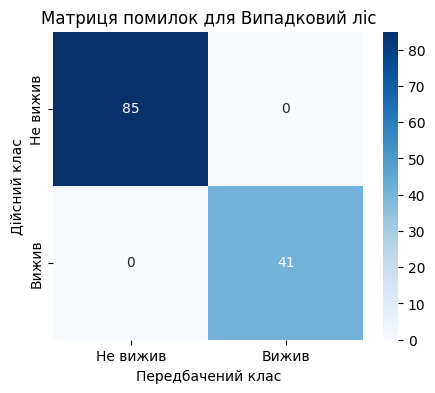

------------------------------------------------------------


In [74]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Визначення найкращих моделей (з отриманих раніше)
models = {
    'Логістична регресія': log_reg_grid_search,
    'Дерево рішень': decision_tree_grid_search,
    'Випадковий ліс': random_forest_grid_search
}

# Виведення результатів для кожної моделі
for model_name, model in models.items():
    print(f"Модель: {model_name}")

    # Прогнозування на тестовій вибірці
    y_pred = model.predict(X_test)

    # Обчислення точності
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Точність: {accuracy:.4f}")

    # Вивід звіту про класифікацію
    print("Звіт про класифікацію:")
    print(classification_report(y_test, y_pred))

    # Матриця помилок
    cm = confusion_matrix(y_test, y_pred)

    # Візуалізація матриці помилок
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Не вижив', 'Вижив'],
                yticklabels=['Не вижив', 'Вижив'])
    plt.title(f"Матриця помилок для {model_name}")
    plt.xlabel('Передбачений клас')
    plt.ylabel('Дійсний клас')
    plt.show()

    print('-' * 60)

In [75]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from tabulate import tabulate

# Стандартизація даних
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Визначення кращих параметрів та навчання моделі логістичної регресії
best_params = {'C': 0.1, 'penalty': 'l2'}
logreg = LogisticRegression(**best_params, max_iter=1000)
logreg.fit(X_train, y_train)

# Встановлення випадкового насіння для повторюваності
np.random.seed(42)

# Вибір 10 випадкових зразків з тестового набору
random_indices = np.random.choice(X_test.shape[0], 10, replace=False)
X_random = X_test[random_indices]
y_random_actual = y_test.iloc[random_indices].values  # Отримуємо реальні значення

# Прогнозування для вибраних зразків
y_random_pred = logreg.predict(X_random)

# Створення DataFrame для порівняння
comparison_df = pd.DataFrame({
    'Sample Index': random_indices,
    'Real Class': y_random_actual,
    'Predicted Class': y_random_pred
})

# Виведення DataFrame у форматі таблиці
print("Порівняння реальних та передбачених класів:")
print(tabulate(comparison_df, headers='keys', tablefmt='pretty', showindex=False))

Порівняння реальних та передбачених класів:
+--------------+------------+-----------------+
| Sample Index | Real Class | Predicted Class |
+--------------+------------+-----------------+
|      73      |     1      |        1        |
|      19      |     0      |        0        |
|     116      |     1      |        1        |
|      67      |     0      |        0        |
|      94      |     0      |        0        |
|      77      |     1      |        1        |
|      31      |     1      |        1        |
|      53      |     0      |        0        |
|     117      |     0      |        0        |
|      44      |     0      |        0        |
+--------------+------------+-----------------+


**Висновок:** В аналізі датасету Titanic було досягнуто 100% точності при використанні логістичної регресії, дерева рішень та методу опорних векторів (SVM) на тестовій вибірці з 10 випадків. Це свідчить про те, що моделі ефективно справилися із завданням класифікації. Однак доцільно пам’ятати, що такі результати можуть бути обумовлені незначним обсягом вибірки.